# Kaj so nevronske mreže


# Nevron

$\Large o = \sum_{j=0}^{n}(i_j w_j) + b$

* $i_j$ je specifičen input
* $w_j$ je weight specifičnega inputa
* $b$   je bias nevrona

<hr>

![Nevron](images/01.PNG)

$o = \sum_{j=0}^{n}(i_j w_j) + b = i_0 \cdot w_0 + i_1 \cdot w_1 + i_2 \cdot w_2 + b = 1 \cdot 0.2 + 2 \cdot 0.8 + 3 \cdot (-0.5) + 2 = 2.3$

In [1]:
inputs = [1,2,3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

2.3


![Nevron - 4 inputs](images/02.PNG)

$o = \sum_{j=0}^{n}(i_j w_j) + b = i_0 \cdot w_0 + i_1 \cdot w_1 + i_2 \cdot w_2 + i_3 \cdot w_3 + b = 1 \cdot 0.2 + 2 \cdot 0.8 + 3 \cdot (-0.5) + 2.5 \cdot 1.0 + 2 = 4.8$

In [2]:
inputs = [1,2,3,2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
print(output)

4.8


**Dot product:**

$\Large \vec{a}^{\,}\cdot \vec{b}^{\,} = [1,2,3]\cdot [2,3,4] = 1\cdot 2 + 2\cdot 3 + 3\cdot 4 = 20$

In [4]:
import numpy as np

inputs = [1,2,3,2.5]
weights = [0.2, 0.8, -0.5, 1]
bias = 2

output = np.dot(weights, inputs) + bias
print(output)

4.8


# Plast nevronov


![Dense layer](images/03.PNG)

In [5]:
inputs = [1,2,3,2.5]
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
    inputs[0]*weights1[0] +
    inputs[1]*weights1[1] +
    inputs[2]*weights1[2] +
    inputs[3]*weights1[3] +
    bias1,
    
    inputs[0]*weights2[0] +
    inputs[1]*weights2[1] +
    inputs[2]*weights2[2] +
    inputs[3]*weights2[3] +
    bias2,
    
    inputs[0]*weights3[0] +
    inputs[1]*weights3[1] +
    inputs[2]*weights3[2] +
    inputs[3]*weights3[3] +
    bias3,
]
print(outputs)

[4.8, 1.21, 2.385]


In [6]:
inputs = [1,2,3,2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


<hr>


![2 Dense layers](images/04.PNG)

In [16]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]

# Dense layer 1
weights = [[ 0.20,  0.80, -0.50,  1.00],
           [ 0.50, -0.91,  0.26, -0.50],
           [-0.26, -0.27,  0.17,  0.87]]
biases = [2.0, 3.0, 0.5]

# Dense layer 2
weights2 = [[ 0.10, -0.14,  0.50],
            [-0.50,  0.12, -0.33],
            [-0.44,  0.73, -0.13]]
biases2 = [-1, 2, -0.5]


layer1_outputs = np.dot(weights, inputs) + biases
layer2_outputs = np.dot(weights2, layer1_outputs) + biases2

print("Layer 1: ", layer1_outputs)
print("Layer 2: ", layer2_outputs)

Layer 1:  [4.8   1.21  2.385]
Layer 2:  [ 0.5031  -1.04185 -2.03875]


<hr>

In [17]:
import numpy as np
np.random.seed(2020)


class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_neurons, n_inputs)
        print("Weights: ")
        print(self.weights)
        self.biases = np.zeros(n_neurons)
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(self.weights, inputs) + self.biases

inputs = [1.0, 2.0, 3.0, 2.5]

print("Creating DENSE 1")
dense1 = Layer_Dense(4, 3)
print("Creating DENSE 2")
dense2 = Layer_Dense(3, 3)

dense1.forward(inputs)
dense2.forward(dense1.output)

print("Dense 1 output: ")
print(dense1.output)
print("Dense 2 outut: ")
print(dense2.output)

Creating DENSE 1
Weights: 
[[-0.01768846  0.00075552 -0.0113063  -0.0065143 ]
 [-0.00893116 -0.01274101 -0.00061154  0.00064514]
 [ 0.00410113 -0.00572882 -0.00801334  0.01312035]]
Bias: 
[0. 0. 0.]
Creating DENSE 2
Weights: 
[[ 0.01274699 -0.01214358  0.00313719]
 [-0.01444821 -0.00368961 -0.00769227]
 [ 0.00392616  0.00057294  0.02089979]]
Bias: 
[0. 0. 0.]
Dense 1 output: 
[-0.06638206 -0.03463496  0.00140435]
Dense 2 outut: 
[-0.00042117  0.00107609 -0.00025112]


<hr>

In [18]:
inputs = [[1.0, 2.0, 3.0, 2.5],
         [2.0, 5.0, -1.0, 2.0],
         [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(np.array(inputs), np.array(weights)) + biases
print(layer_outputs)

ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)

![Matrix calculation](images/05.PNG)

In [19]:
inputs = [[1.0, 2.0, 3.0, 2.5],
         [2.0, 5.0, -1.0, 2.0],
         [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.5, -0.26],
          [0.8, -0.91, -0.27],
          [-0.5, 0.26, 0.17],
          [1, -0.5, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = np.dot(np.array(inputs), np.array(weights)) + biases
print(layer_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


<hr>

In [20]:
import numpy as np
np.random.seed(2020)

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        # <=== HERE ===>
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # <=== HERE ===>
        print("Weights: ")
        print(self.weights)
        # <=== HERE ===>
        self.biases = np.zeros((1, n_neurons))
        # <=== HERE ===>
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        # <=== HERE ===>
        self.output = np.dot(inputs, self.weights) + self.biases
        # <=== HERE ===>
        
inputs = np.array([[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]])
print("Inputs:")
print(inputs)

dense1 = Layer_Dense(4,3)
dense1.forward(inputs)

print("Dense OUTPUT")
print(dense1.output)

Inputs:
[[ 1.   2.   3.   2.5]
 [ 2.   5.  -1.   2. ]
 [-1.5  2.7  3.3 -0.8]]
Weights: 
[[-0.01768846  0.00075552 -0.0113063 ]
 [-0.0065143  -0.00893116 -0.01274101]
 [-0.00061154  0.00064514  0.00410113]
 [-0.00572882 -0.00801334  0.01312035]]
Bias: 
[[0. 0. 0.]]
Dense OUTPUT
[[-0.04687376 -0.03520472  0.00831595]
 [-0.07879453 -0.05981655 -0.06417807]
 [ 0.01150903 -0.01670778 -0.01440384]]


# Activation functions

![Activation function](images/06.PNG)

## Step Activation Function

$\Large 
y = 
\left\{
	\begin{array}{ll}
		1  & x > 0 \\
        0  & x \leq 0
	\end{array}
\right.
$

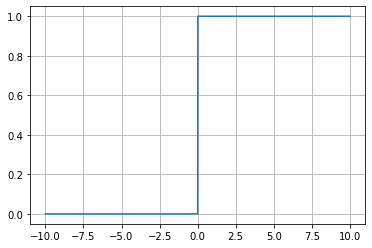

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def step_function(x):
    return 1 if x>0 else 0

X = np.arange(-10, 10, 0.01)
y = [step_function(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

## Sigmoid Activation Function

$\Large y = \frac{1}{1+e^{-x}}$

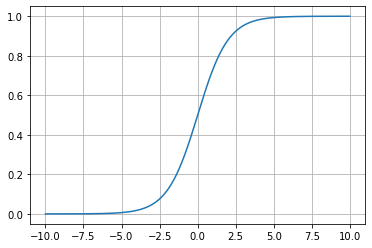

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

X = np.arange(-10, 10, 0.01)
y = [sigmoid(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

## Rectified Linear Units - ReLU

$\Large 
y = 
\left\{
	\begin{array}{ll}
		x  & x > 0 \\
        0  & x \leq 0
	\end{array}
\right.
$

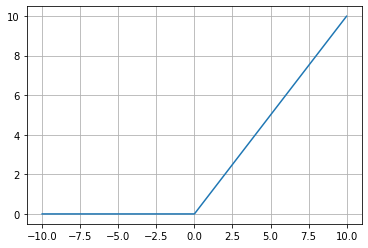

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return x if x>0 else 0

X = np.arange(-10, 10, 0.01)
y = [relu(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

In [ ]:
def relu(x):
    return x if x>0 else 0


## Uporaba aktivacijske funkcije v naši neuronski merži

In [27]:

np.random.seed(2020)
class Activation_ReLu:
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
n_samples = 4
neurons = 3
X = np.random.normal(size=(n_samples, neurons))
print("INputs.")
print(X)

activation = Activation_ReLu()
activation.forward(X)
print("Output")
print(activation.output)

INputs.
[[-1.76884571  0.07555227 -1.1306297 ]
 [-0.65143017 -0.89311563 -1.27410098]
 [-0.06115443  0.06451384  0.41011295]
 [-0.57288249 -0.80133362  1.31203519]]
Output
[[0.         0.07555227 0.        ]
 [0.         0.         0.        ]
 [0.         0.06451384 0.41011295]
 [0.         0.         1.31203519]]


<hr>

Celotna koda:

In [28]:
import numpy as np
np.random.seed(2020)

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        print("Weights: ")
        print(self.weights)
        self.biases = np.zeros((1, n_neurons))
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# <=== HERE ===>
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output valzes from input
        self.output = np.maximum(0, inputs)
# <=== HERE ===>
        
        
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

print("Ustvarimo DENSE 1")
dense1 = Layer_Dense(4, 3)
# <=== HERE ===>
activation1 = Activation_ReLU()
# <=== HERE ===>
print("Ustvarimo DENSE 2")
dense2 = Layer_Dense(3, 3)

dense1.forward(inputs)
# <=== HERE ===>
activation1.forward(dense1.output)
# <=== HERE ===>
dense2.forward(activation1.output)

print()
print("Dense 1 output: ")
print(dense1.output)
# <=== HERE ===>
print("ReLU 1 output:")
print(activation1.output)
# <=== HERE ===>
print("Dense 2 output: ")
print(dense2.output)

Ustvarimo DENSE 1
Weights: 
[[-0.01768846  0.00075552 -0.0113063 ]
 [-0.0065143  -0.00893116 -0.01274101]
 [-0.00061154  0.00064514  0.00410113]
 [-0.00572882 -0.00801334  0.01312035]]
Bias: 
[[0. 0. 0.]]
Ustvarimo DENSE 2
Weights: 
[[ 0.01274699 -0.01214358  0.00313719]
 [-0.01444821 -0.00368961 -0.00769227]
 [ 0.00392616  0.00057294  0.02089979]]
Bias: 
[[0. 0. 0.]]

Dense 1 output: 
[[-0.04687376 -0.03520472  0.00831595]
 [-0.07879453 -0.05981655 -0.06417807]
 [ 0.01150903 -0.01670778 -0.01440384]]
ReLU 1 output:
[[0.         0.         0.00831595]
 [0.         0.         0.        ]
 [0.01150903 0.         0.        ]]
Dense 2 output: 
[[ 3.26497657e-05  4.76452766e-06  1.73801632e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.46705536e-04 -1.39760839e-04  3.61060755e-05]]


## Classification dataset

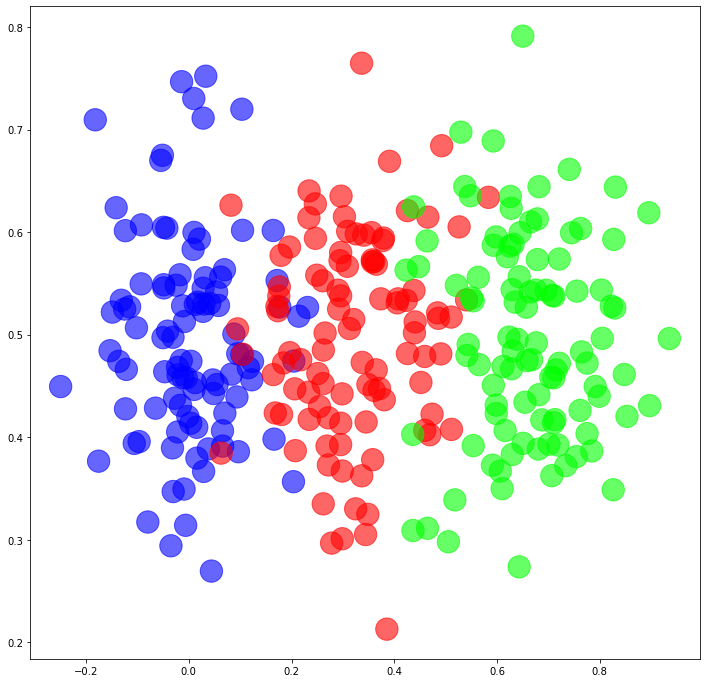

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def vertical_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
        
    return X, y

X, y = vertical_data(samples=100, classes=3)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
plt.show()

## Softmax Activation Function



$\Large S_j = \frac{e^{o_j}}{\sum_{l=0}^{L}e^{o_l}}$

* $S_j$ je confidence score $j$ razreda
* $o_j$ je izhodna vrednost neurona
* $\sum_{l=0}^{L}e^{o_l}$ je seštevek $e^o$ vseh izhodnih vrednosti neuronov

In [30]:
def softmax(inputs):
    exp_values = np.exp(inputs)
    return exp_values / np.sum(exp_values)

layer_outputs = [1, 2, 3, 2.5]

softmax_output = softmax(layer_outputs)
print(softmax_output)

[0.06414769 0.17437149 0.47399085 0.28748998]


In [33]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
layer_outputs = [[1, 2, 3, 2.5],
                [2, 5, -1, 2],
                [-1.5, 2.7, 3.3, -0.8]]

softmax = Activation_Softmax()
softmax.forward(layer_outputs)
print(softmax.output)
        

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


In [34]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
layer_outputs = [[1, 2, 3, 2.5],
                [2, 5, -1, 2],
                [-1.5, 2.7, 3.3, -0.8]]

softmax = Activation_Softmax()
softmax.forward(layer_outputs)
print(softmax.output)
        

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


In [35]:
import numpy as np
np.random.seed(2020)

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# <=== HERE ===>
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
# <=== HERE ===>      
        
# <=== HERE ===>
X, y = vertical_data(samples=100, classes=3)
# <=== HERE ===>

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
# <=== HERE ===>
activation2 = Activation_Softmax()
# <=== HERE ===>

# <=== HERE ===>
dense1.forward(X[:5])
# <=== HERE ===>
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# <=== HERE ===>
activation2.forward(dense2.output)
# <=== HERE ===>

print("Dense 1 output: ")
print(dense1.output)
print("ReLU 1 output:")
print(activation1.output)
print("Dense 2 outut: ")
print(dense2.output)
# <=== HERE ===>
print("Softmax output - PREDICTION")
print(activation2.output)
# <=== HERE ===>

Dense 1 output: 
[[ 0.00029356  0.00378404 -0.00761929]
 [ 0.0013401   0.00344398 -0.00409113]
 [ 0.00058695  0.00348314 -0.006174  ]
 [ 0.00103049  0.00385227 -0.00581772]
 [ 0.0010549   0.00432745 -0.00680751]]
ReLU 1 output:
[[0.00029356 0.00378404 0.        ]
 [0.0013401  0.00344398 0.        ]
 [0.00058695 0.00348314 0.        ]
 [0.00103049 0.00385227 0.        ]
 [0.0010549  0.00432745 0.        ]]
Dense 2 outut: 
[[-7.09496948e-05 -4.68469341e-05  2.76271632e-05]
 [-5.99167243e-05 -3.79621801e-05  2.47480826e-05]
 [-6.39330692e-05 -4.17416733e-05  2.53132839e-05]
 [-6.90534754e-05 -4.45039336e-05  2.78550943e-05]
 [-7.80169708e-05 -5.04409554e-05  3.13289484e-05]]
Softmax output - PREDICTION
[[0.3333197  0.33332774 0.33335256]
 [0.33332149 0.3333288  0.33334971]
 [0.33332095 0.33332835 0.3333507 ]
 [0.33331984 0.33332802 0.33335214]
 [0.33331812 0.33332731 0.33335457]]


# Loss Function and Accuracy

## Categorical Cross-Entropy Loss

$\Large L = - \sum_{j}y_j log(\hat{y_j})$

* $L$ je **loss** vrednost
* $y_j$ je resnična vrednost
* $\hat{y_j}$ je napovedana vrednost

In [36]:
inputs = [0.7, 0.1, 0.2]
real_values = [1, 0, 0]

loss = -(real_values[0]*np.log(inputs[0]) +
        real_values[1]*np.log(inputs[1]) +
        real_values[2]*np.log(inputs[2]))
print(loss)

0.35667494393873245


<hr>

$\Large L = - \sum_{j}y_j log(\hat{y_j}) = \\ 
\Large -( y_0 log(\hat{y_0}) + y_1 log(\hat{y_1}) + y_2 log(\hat{y_2})) = \\ 
\Large -(1 \cdot log(\hat{y_0}) + 0 \cdot log(\hat{y_1}) + 0 \cdot log(\hat{y_2})) = \\
\Large - log(\hat{y_0}) = - log(\hat{y_k})$

* $k$ - index pravilnega razreda

In [38]:
inputs = [0.7, 0.1, 0.2]
real_values = [1, 0, 0]

correct_class_index = real_values.index(1)
loss = - np.log(inputs[correct_class_index])
print(loss)

0.35667494393873245


In [39]:
print(-np.log(0.1))
print(-np.log(0.1+1e-7))

2.3025850929940455
2.302584092994546


In [40]:
print(-np.log(1))

-0.0


In [41]:
print(-np.log(1))
print(-np.log(1-1e-7))

-0.0
1.0000000494736474e-07


In [42]:
inputs = [1, 0.0, 0.3]
cor_inputs = np.clip(inputs, 1e-7, 1-1e-7)
real_values = [0, 1, 0]

correct_class_index = real_values.index(1)
loss = -np.log(cor_inputs[correct_class_index])
print(loss)

16.11809565095832


<hr>

In [45]:
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
            
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                    y_pred_clipped * y_true,
                axis=1
            )
        print("Correct confidences")
        print(correct_confidences)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]
])

class_targets = np.array([[1, 0, 0],
                         [0, 1, 0],
                         [0, 1, 0]])
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

Correct confidences
[0.7 0.5 0.9]
0.38506088005216804


<hr>

In [46]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# <=== HERE ===>
# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
# <=== HERE ===>

        

X, y = vertical_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# <=== HERE ===>
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# <=== HERE ===>

# <=== HERE ===>
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# <=== HERE ===>


# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# <=== HERE ===>
# Let's see output of the first few samples:
print("Predictions")
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)
# <=== HERE ===>

Predictions
[[0.33333592 0.33333506 0.33332902]
 [0.333335   0.3333354  0.3333296 ]
 [0.33333435 0.33333587 0.33332977]
 [0.33333823 0.3333366  0.33332518]
 [0.3333338  0.33333566 0.33333055]]
loss: 1.098616755173688


<hr>

[[0.3333197  0.33332774 0.33335256]
 [0.33332149 0.3333288  0.33334971]
 [0.33332095 0.33332835 0.3333507 ]
 [0.33331984 0.33332802 0.33335214]
 [0.33331812 0.33332731 0.33335457]]
loss: 1.0986002071329923
Accuracy:  0.3333333333333333


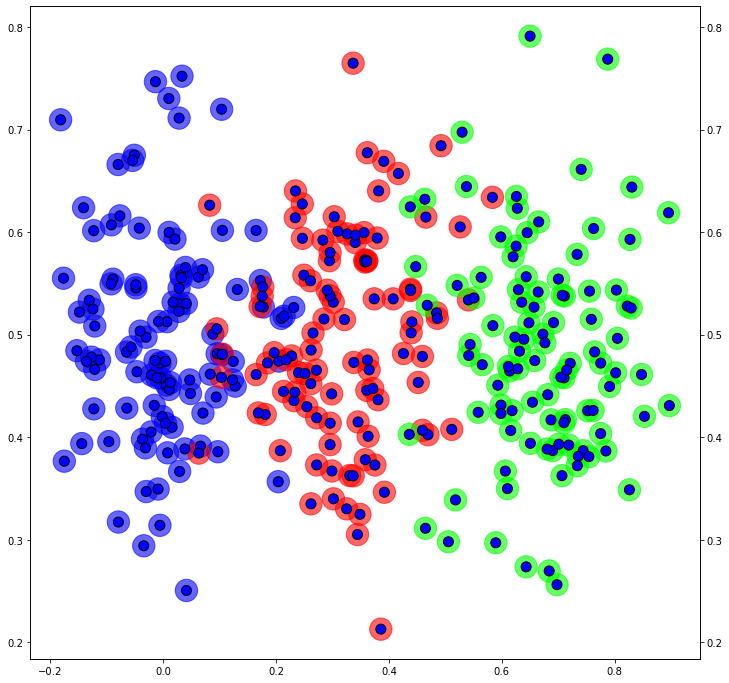

In [47]:
np.random.seed(2020)
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        

X, y = vertical_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)


# <=== HERE ===>

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)
print("Accuracy: ", accuracy)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()
# <=== HERE ===>

# Optimizing


## Random search

In [48]:
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# <=== HERE ===>
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):

    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through loss function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
# <=== HERE ===>

New set of weights found, iteration: 0 loss: 1.099172486144514 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0990338213337882 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0990083723738544 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0988482828809323 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.0984070984745369 acc: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0982094303484753 acc: 0.3333333333333333
New set of weights found, iteration: 99 loss: 1.0973608354466369 acc: 0.3333333333333333
New set of weights found, iteration: 116 loss: 1.0973599711172715 acc: 0.3333333333333333
New set of weights found, iteration: 132 loss: 1.0972807043800246 acc: 0.3333333333333333
New set of weights found, iteration: 162 loss: 1.0966462939787796 acc: 0.3333333333333333
New set of weights found, iteration: 741 loss: 1.0960786003326586 acc: 0.3333333333333333


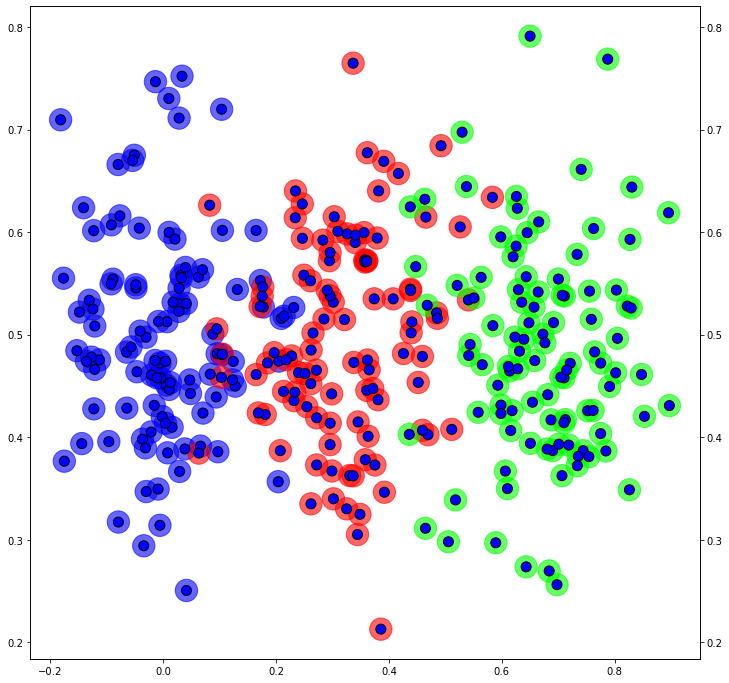

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

## Fraction Change


In [56]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):
    # <=== HERE ===>
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # <=== HERE ===>

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 1.0991206973804875 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0989454830179595 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.098630053945509 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.0984986987184229 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0963598574161162 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0939011228652415 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0923727159291765 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0919633163978937 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.089064427319415 acc: 0.3333333333333333
New set of weights found, iteration: 28 loss: 1.0887023458364031 acc: 0.3333333333333333
New set of weights found, iteration: 29 loss: 1.088507806243374 acc: 0.3333333333333333
New set of weights found, 

New set of weights found, iteration: 343 loss: 0.4929716168305391 acc: 0.9
New set of weights found, iteration: 345 loss: 0.48469027563358813 acc: 0.8966666666666666
New set of weights found, iteration: 348 loss: 0.4807782700852975 acc: 0.9
New set of weights found, iteration: 349 loss: 0.473612517894368 acc: 0.8933333333333333
New set of weights found, iteration: 350 loss: 0.4707571219457996 acc: 0.9
New set of weights found, iteration: 352 loss: 0.4581366550806221 acc: 0.9133333333333333
New set of weights found, iteration: 354 loss: 0.4566632504043612 acc: 0.9
New set of weights found, iteration: 358 loss: 0.45433552111318837 acc: 0.8933333333333333
New set of weights found, iteration: 359 loss: 0.4487297329660466 acc: 0.9033333333333333
New set of weights found, iteration: 360 loss: 0.4429699934315703 acc: 0.9033333333333333
New set of weights found, iteration: 364 loss: 0.4426449138892567 acc: 0.9066666666666666
New set of weights found, iteration: 366 loss: 0.4386896997663733 acc

New set of weights found, iteration: 1165 loss: 0.20529841054807657 acc: 0.9066666666666666
New set of weights found, iteration: 1169 loss: 0.2046980354557465 acc: 0.9066666666666666
New set of weights found, iteration: 1177 loss: 0.20374251019127282 acc: 0.9166666666666666
New set of weights found, iteration: 1183 loss: 0.20350227005326926 acc: 0.9166666666666666
New set of weights found, iteration: 1188 loss: 0.2026167638745484 acc: 0.9166666666666666
New set of weights found, iteration: 1191 loss: 0.20226819774526505 acc: 0.91
New set of weights found, iteration: 1196 loss: 0.20008022042760124 acc: 0.9133333333333333
New set of weights found, iteration: 1202 loss: 0.1996032912084219 acc: 0.9166666666666666
New set of weights found, iteration: 1206 loss: 0.19876408736581003 acc: 0.9166666666666666
New set of weights found, iteration: 1207 loss: 0.19874131704205772 acc: 0.92
New set of weights found, iteration: 1211 loss: 0.19773244293267353 acc: 0.9166666666666666
New set of weights 

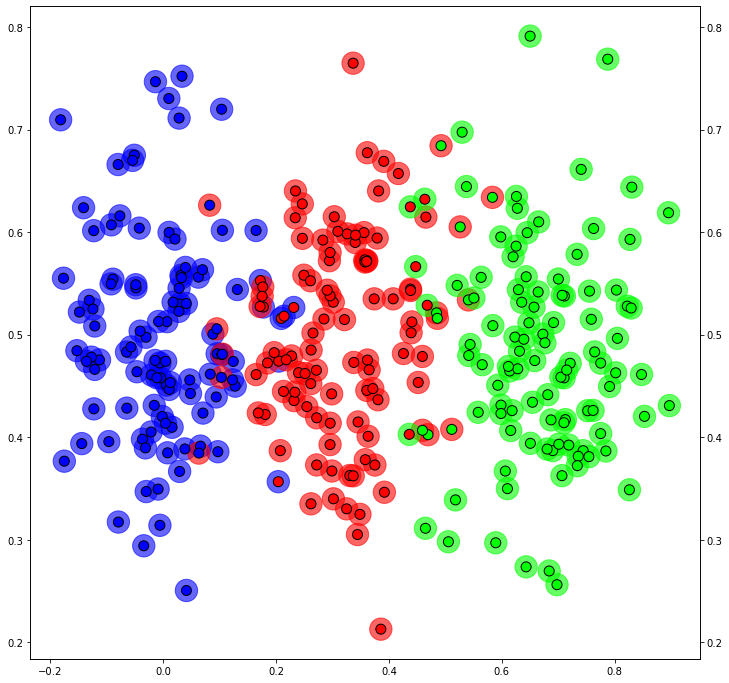

In [57]:
# To je za TRAINING VALIDATION

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Test loss 0.20385661281790804, 	 Test Accuracy: 0.9166666666666666


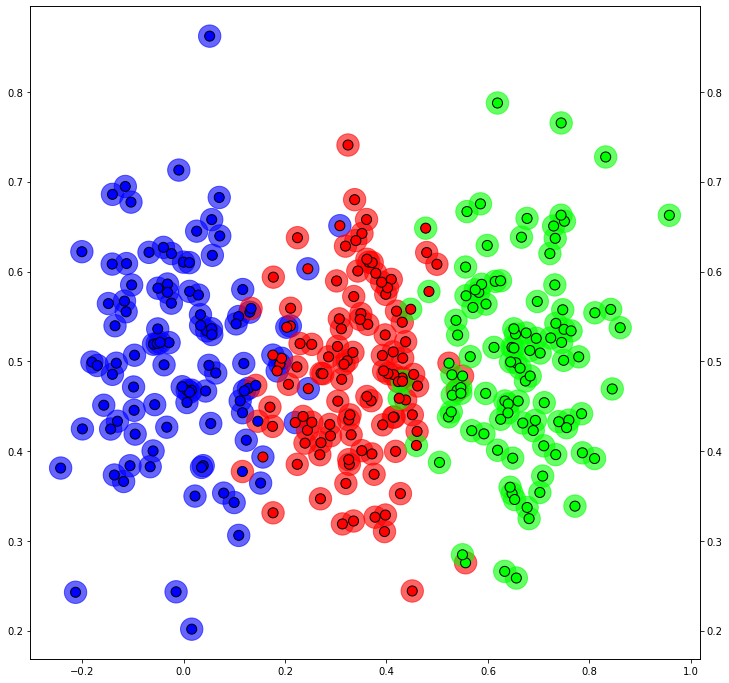

In [59]:
X, y = vertical_data(samples=100, classes=3)

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
loss = loss_function.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print(f"Test loss {loss}, \t Test Accuracy: {accuracy}")

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

<hr>

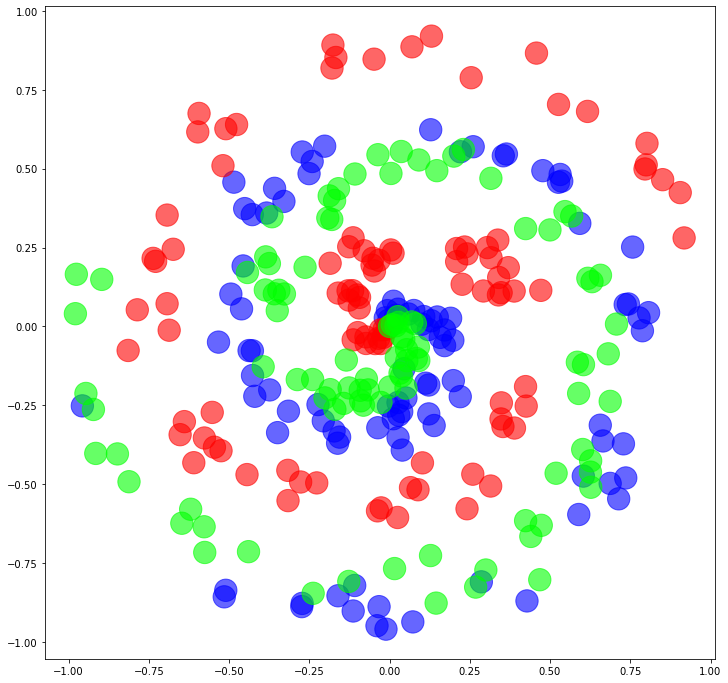

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Copyright (c) 2015 Andrej Karpathy
# License: https://github.com/cs231n/cs231n.github.io/blob/master/LICENSE
# Source: https://cs231n.github.io/neural-networks-case-study/
def spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# <=== HERE ===>       
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# <=== HERE ===>


# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):

    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.101776255582696 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987228052068028 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.098486682986459 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0984008968027252 acc: 0.37333333333333335
New set of weights found, iteration: 18 loss: 1.098037008036807 acc: 0.32666666666666666
New set of weights found, iteration: 19 loss: 1.0979495541803606 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0977012521975935 acc: 0.35
New set of weights found, iteration: 25 loss: 1.097541461925107 acc: 0.3433333333333333
New set of weights found, iteration: 26 loss: 1.0972445892769975 acc: 0.36333333333333334
New set of weights found, iteration: 37 loss: 1.096695052563302 acc: 0.4
New set of weights found, iteration: 44 loss: 1.096242626276354 acc: 0.37
New set of weights found, iteration: 45 loss: 1.0960130084109532 acc: 0

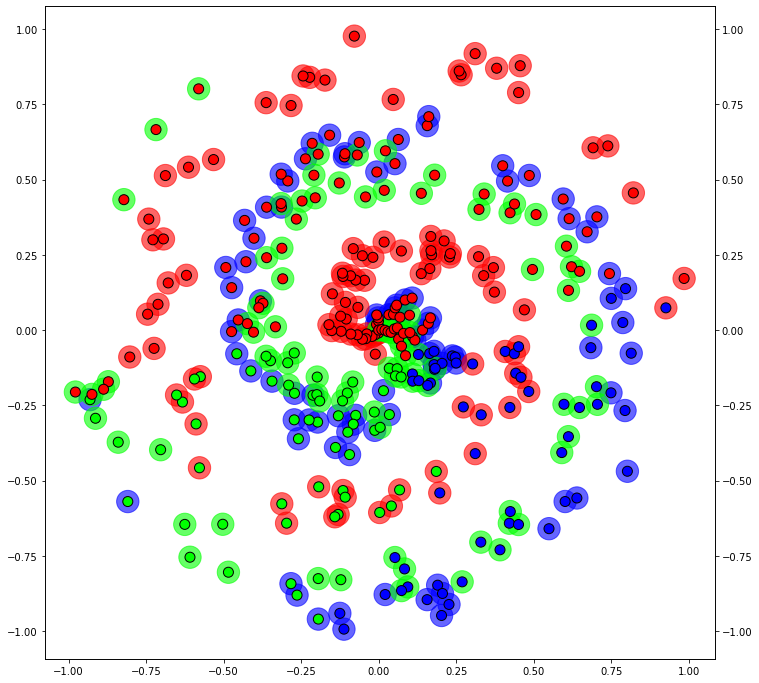

In [62]:
# To je za TRAINING VALIDATION
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

# Partial derivatieves

## Partial derivative for 1 neuron


![Partial derivatives of 1 neuron](images/07.PNG)



$
\Large output = ReLU(z) =  
\left\{
	\begin{array}{ll}
		z  & z > 0 \\
        0  & z \leq 0
	\end{array}
\right.
\\
\Large z = w_0 \cdot i_0 + w_1 \cdot i_1 + w_2 \cdot i_2 + b \\
$
<hr>

$
\Large d\_value \cdot \frac{dReLU}{dz} \cdot \frac{\partial z}{\partial p_j}
$

* $d\_value$ predstavlja vrednost, kako močno je ta neuron vplival na naslednjo plast
* $p_j$ predstavlja parameter katerega vpliv iščemo. Lahko je to specifičnna weight oziroma bias, lahko pa je tudi input

![d_value](images/08.PNG)

<hr>

Parcialni odvod ReLu:

$\Large \frac{dReLU}{dz} =
\left\{
	\begin{array}{ll}
		\frac{d}{dz}z  & z > 0 \\
        \frac{d}{dz}0  & z \leq 0
	\end{array}
\right.
= \left\{
	\begin{array}{ll}
		1  & z > 0 \\
        0  & z \leq 0
	\end{array}
\right.
$

![dReLU_dz](images/09.PNG)

In [63]:
x = [1, -2, 3]
w = [-3, -1, 2]
b = 1

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
print("Z value: ", z)

y = max(z, 0)

dvalue = 1

drelu_dz = dvalue * (1 if z>0 else 0)
print("DRelu value: ", drelu_dz)

Z value:  6
DRelu value:  1


<hr>

Parcialni odvod uteži:

$\Large \frac{\partial z}{\partial w_j} = \frac{\partial}{\partial w_j} \cdot w_j i_j + \frac{\partial}{\partial w_j} w_{j+1} i_{j+1} + \frac{\partial}{\partial w_j} w_{j+2} i_{j+2} + \frac{\partial}{\partial w_j} b = i_j + 0 + 0 + 0 = i_j $

![dsum_dw](images/10.PNG)

In [65]:
x = [1, -2, 3]
w = [-3, -1, 2]
b = 1

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
print("Z value: ", z)

y = max(z, 0)

dvalue = 1

drelu_dz = dvalue * (1 if z>0 else 0)
print("DRelu value: ", drelu_dz)

dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]
print("dw0:", dsum_dw0)
print("dw1:", dsum_dw1)
print("dw2: ", dsum_dw2)

Z value:  6
DRelu value:  1
dw0: 1
dw1: -2
dw2:  3


<hr>

Pacrialni odvod bias-a:

$\Large \frac{\partial z}{\partial b} = \frac{\partial}{\partial b} \cdot w_j i_j + \frac{\partial}{\partial b} w_{j+1} i_{j+1} + \frac{\partial}{\partial b} w_{j+2} i_{j+2} + \frac{\partial}{\partial b} b = 0 + 0 + 0 + 1 = 1 $

![dsum_db](images/11.PNG)

In [66]:
x = [1, -2, 3]
w = [-3, -1, 2]
b = 1

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
print("Z value: ", z)

y = max(z, 0)

dvalue = 1

drelu_dz = dvalue * (1 if z>0 else 0)
print("DRelu value: ", drelu_dz)

dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]
print("dw0:", dsum_dw0)
print("dw1:", dsum_dw1)
print("dw2: ", dsum_dw2)

dsum_db = 1
print("DB:", dsum_db)

Z value:  6
DRelu value:  1
dw0: 1
dw1: -2
dw2:  3
DB: 1


<hr>

Parcialni odvod inputa:

$\Large \frac{\partial z}{\partial i_j} = \frac{\partial}{\partial i_j} \cdot w_j i_j + \frac{\partial}{\partial i_j} w_{j+1} i_{j+1} + \frac{\partial}{\partial i_j} w_{j+2} i_{j+2} + \frac{\partial}{\partial i_j} b = w_j + 0 + 0 + 0 = w_j $

![dsum_i](images/12.PNG)

In [67]:
x = [1, -2, 3]
w = [-3, -1, 2]
b = 1

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b
print("Z value: ", z)

y = max(z, 0)

dvalue = 1

drelu_dz = dvalue * (1 if z>0 else 0)
print("DRelu value: ", drelu_dz)

dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]
print("dw0:", dsum_dw0)
print("dw1:", dsum_dw1)
print("dw2: ", dsum_dw2)

dsum_db = 1
print("DB:", dsum_db)

dsum_di0 = drelu_dz * w[0]
dsum_di1 = drelu_dz * w[1]
dsum_di2 = drelu_dz * w[2]
print("di0:", dsum_di0)
print("di1:", dsum_di1)
print("di2:", dsum_di2)

Z value:  6
DRelu value:  1
dw0: 1
dw1: -2
dw2:  3
DB: 1
di0: -3
di1: -1
di2: 2


<hr>

$ p_j = p_j + (-l_r \cdot dp_j) $

* $p_j$ je naš parameter katerega želimo posodobiti. Weights oziroma bias
* $l_r$ je **learning rate**
* $dp_j$ je vrednost parcialnega odvoda

In [68]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("z value: ", z)

# ReLU activation function
y = max(z, 0)
print("ReLU value: ", y)

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("dReLU value: ", drelu_dz)

# Partial derivatives of the summation and multiplication, the chain rule
dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]
dsum_db = 1

print("dw0 value: ", dsum_dw0)
print("dw1 value: ", dsum_dw1)
print("dw2 value: ", dsum_dw2)
print("db value: ", dsum_db)


# <=== HERE ===>
# Optimizing parameters
w[0] += -0.001*dsum_dw0
w[1] += -0.001*dsum_dw1
w[2] += -0.001*dsum_dw2
b += -0.001*dsum_db

print()
print("New weights: ", w)
print("New bias: ", b)

# Another forward pass. Excpecting a lower result now.
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("New z value: ", z)

# ReLU activation function
y = max(z, 0)
print("New ReLU value: ", y)
# <=== HERE ===>

z value:  6.0
ReLU value:  6.0
dReLU value:  1.0
dw0 value:  1.0
dw1 value:  -2.0
dw2 value:  3.0
db value:  1

New weights:  [-3.001, -0.998, 1.997]
New bias:  0.999
New z value:  5.985
New ReLU value:  5.985


<hr>

In [69]:
import numpy as np
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

        
    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
    # <=== HERE ===>


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
    # <=== HERE ===>

        
        
inputs = np.array([[1.0, 2.0, 3.0, 2.5],
                  [1.0, 2.0, 3.0, 2.5],
                  [1.0, 2.0, 3.0, 2.5]])

dense1 = Layer_Dense(4, 3)
print("Dense 1 weights: ")
print(dense1.weights)
print("Dense 1 biases")
print(dense1.biases)
activation1 = Activation_ReLU()

dense1.forward(inputs)
print("Dense 1 forward")
print(dense1.output)
activation1.forward(dense1.output)
print("ReLU 1 output:")
print(activation1.output)

# <=== HERE ===>
# d_values passed from next layer back to this layer
d_values = np.array([[1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0]])

activation1.backward(d_values)
print("Activation 1 dinputs")
print(activation1.dinputs)
dense1.backward(activation1.dinputs)
print("Dense 1 dweights")
print(dense1.dweights)
print("Dense 1 dbias")
print(dense1.dbiases)
print("Dense 1 dinputs")
print(dense1.dinputs)
# <=== HERE ===>

Dense 1 weights: 
[[-0.01768846  0.00075552 -0.0113063 ]
 [-0.0065143  -0.00893116 -0.01274101]
 [-0.00061154  0.00064514  0.00410113]
 [-0.00572882 -0.00801334  0.01312035]]
Dense 1 biases
[[0. 0. 0.]]
Dense 1 forward
[[-0.04687376 -0.03520472  0.00831595]
 [-0.04687376 -0.03520472  0.00831595]
 [-0.04687376 -0.03520472  0.00831595]]
ReLU 1 output:
[[0.         0.         0.00831595]
 [0.         0.         0.00831595]
 [0.         0.         0.00831595]]
Activation 1 dinputs
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Dense 1 dweights
[[0.  0.  3. ]
 [0.  0.  6. ]
 [0.  0.  9. ]
 [0.  0.  7.5]]
Dense 1 dbias
[[0. 0. 3.]]
Dense 1 dinputs
[[-0.0113063  -0.01274101  0.00410113  0.01312035]
 [-0.0113063  -0.01274101  0.00410113  0.01312035]
 [-0.0113063  -0.01274101  0.00410113  0.01312035]]


# Odvodi Loss FunctionS in Softmax layer


$\Large \frac{\partial L}{\partial z_k} = \hat{y_k} - y_k $

* $L$ predstavlja categorical crossentropy loss funkcijo
* $\hat{y_k}$ predstavlja napovedano vrednost
* $y_k$ predstavlja realno vrednost


In [70]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities



# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods



# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    
    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples
    # <=== HERE ===>


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print("Partial derivatives")
print("Dense 1: dweights")
print(dense1.dweights)
print("Dense 1: dbiases")
print(dense1.dbiases)
print("Dense 2: dweights")
print(dense2.dweights)
print("Dense 2: dbiases")
print(dense2.dbiases)

[[0.33333333 0.33333333 0.33333333]
 [0.33333329 0.33333349 0.33333321]
 [0.33333337 0.33333306 0.33333356]
 [0.33333324 0.33333369 0.33333307]
 [0.3333334  0.33333291 0.3333337 ]]
loss: 1.098612979464715
acc: 0.36
Partial derivatives
Dense 1: dweights
[[ 6.32785072e-06 -1.67157857e-05 -6.78635455e-05]
 [-1.70771268e-04  1.36645973e-04 -2.23167263e-04]]
Dense 1: dbiases
[[-2.11037594e-04 -5.71635826e-06 -3.98783662e-04]]
Dense 2: dweights
[[ 1.46060426e-04 -1.90209366e-07 -1.45870217e-04]
 [-4.00333370e-05 -1.28032481e-04  1.68065818e-04]
 [ 4.01205065e-05 -7.51643258e-05  3.50438193e-05]]
Dense 2: dbiases
[[-1.21279560e-06  2.10014893e-06 -8.87353336e-07]]


# Optimizers


## Stochastic Gradient Descent (SGD) Optimizer

Za začetek si bomo pogledali splošni SGD Optimizer. Pri tem parametre posodobimo tako, da jim odštejemo majhen del njihove vrednosti odvoda.

$\Large p_i = p_i - l_r \cdot d\_p_i$

* $p_i$ je parameter katerega želimo posodobiti. Weights oziroma bias
* $l_r$ je **learning rate**, ki nadzira kako velike posodobitve parametrev naredimo z enim korakom učenja
* $d\_p_i$ je parcialni odvod loss funkcije glede na parameter $p_i$

In [71]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate
        
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

<hr>

In [72]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

# <=== HERE ===>
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases
# <=== HERE ===>
        
        
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# <=== HERE ===>
# Create optimizer
optimizer = Optimizer_SGD()
# <=== HERE ===>



# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
#print(dense1.dweights)
#print(dense1.dbiases)
#print(dense2.dweights)
#print(dense2.dbiases)

# <=== HERE ===>
# Update weights and biases
optimizer.update_params(dense1)
optimizer.update_params(dense2)



# And if we make anothe forward pass with same data we should have lowered the loss


# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)
# <=== HERE ===>

[[0.33333333 0.33333333 0.33333333]
 [0.33333336 0.33333343 0.33333322]
 [0.33333338 0.33333353 0.33333309]
 [0.3333334  0.33333362 0.33333298]
 [0.3333334  0.33333362 0.33333298]]
loss: 1.0986111251885078
acc: 0.3466666666666667
[[0.33333223 0.33333208 0.33333569]
 [0.33333225 0.33333218 0.33333557]
 [0.33333228 0.33333228 0.33333544]
 [0.3333323  0.33333238 0.33333532]
 [0.3333323  0.33333238 0.33333533]]
loss: 1.0986109911090771
acc: 0.38666666666666666


<hr>

# Training in epochos

In [73]:
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()



# <=== HERE ===>
# Train in loop
for epoch in range(10_001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.5f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
# <=== HERE ===>

epoch: 0, acc: 0.303, loss: 1.09861
epoch: 100, acc: 0.407, loss: 1.09230
epoch: 200, acc: 0.413, loss: 1.07876
epoch: 300, acc: 0.390, loss: 1.07696
epoch: 400, acc: 0.393, loss: 1.07566
epoch: 500, acc: 0.397, loss: 1.07516
epoch: 600, acc: 0.390, loss: 1.07498
epoch: 700, acc: 0.387, loss: 1.07494
epoch: 800, acc: 0.387, loss: 1.07493
epoch: 900, acc: 0.390, loss: 1.07493
epoch: 1000, acc: 0.390, loss: 1.07492
epoch: 1100, acc: 0.393, loss: 1.07492
epoch: 1200, acc: 0.397, loss: 1.07492
epoch: 1300, acc: 0.393, loss: 1.07492
epoch: 1400, acc: 0.390, loss: 1.07492
epoch: 1500, acc: 0.397, loss: 1.07492
epoch: 1600, acc: 0.397, loss: 1.07492
epoch: 1700, acc: 0.393, loss: 1.07493
epoch: 1800, acc: 0.390, loss: 1.07492
epoch: 1900, acc: 0.397, loss: 1.07492
epoch: 2000, acc: 0.390, loss: 1.07493
epoch: 2100, acc: 0.397, loss: 1.07492
epoch: 2200, acc: 0.397, loss: 1.07492
epoch: 2300, acc: 0.397, loss: 1.07492
epoch: 2400, acc: 0.393, loss: 1.07492
epoch: 2500, acc: 0.393, loss: 1.0749

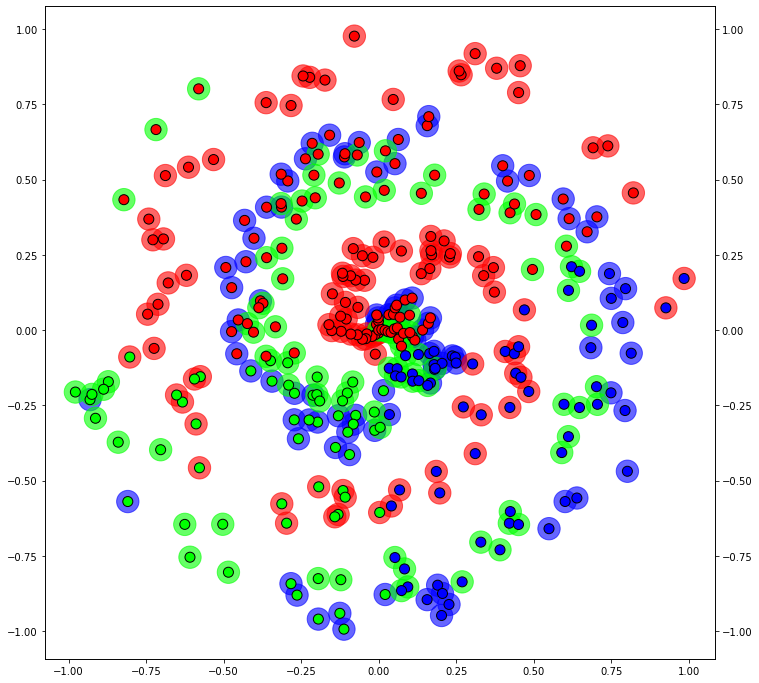

In [74]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


X, y = spiral_data(samples=100, classes=3)



# <=== HERE ===>
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 128)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()


# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(128, 3)
# <=== HERE ===>



# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()


# <=== HERE ===>
# Create optimizer
optimizer = Optimizer_SGD(learning_rate=0.85)
# <=== HERE ===>


# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.343, loss: 1.099
epoch: 100, acc: 0.407, loss: 1.083
epoch: 200, acc: 0.447, loss: 1.072
epoch: 300, acc: 0.430, loss: 1.070
epoch: 400, acc: 0.430, loss: 1.069
epoch: 500, acc: 0.423, loss: 1.068
epoch: 600, acc: 0.417, loss: 1.068
epoch: 700, acc: 0.423, loss: 1.067
epoch: 800, acc: 0.423, loss: 1.065
epoch: 900, acc: 0.437, loss: 1.062
epoch: 1000, acc: 0.460, loss: 1.057
epoch: 1100, acc: 0.450, loss: 1.050
epoch: 1200, acc: 0.467, loss: 1.039
epoch: 1300, acc: 0.523, loss: 1.024
epoch: 1400, acc: 0.537, loss: 1.008
epoch: 1500, acc: 0.497, loss: 0.990
epoch: 1600, acc: 0.427, loss: 0.990
epoch: 1700, acc: 0.393, loss: 0.983
epoch: 1800, acc: 0.400, loss: 0.974
epoch: 1900, acc: 0.410, loss: 0.971
epoch: 2000, acc: 0.457, loss: 0.954
epoch: 2100, acc: 0.483, loss: 0.947
epoch: 2200, acc: 0.513, loss: 0.924
epoch: 2300, acc: 0.537, loss: 0.898
epoch: 2400, acc: 0.587, loss: 0.879
epoch: 2500, acc: 0.550, loss: 0.909
epoch: 2600, acc: 0.583, loss: 0.837
epoch: 2700, 

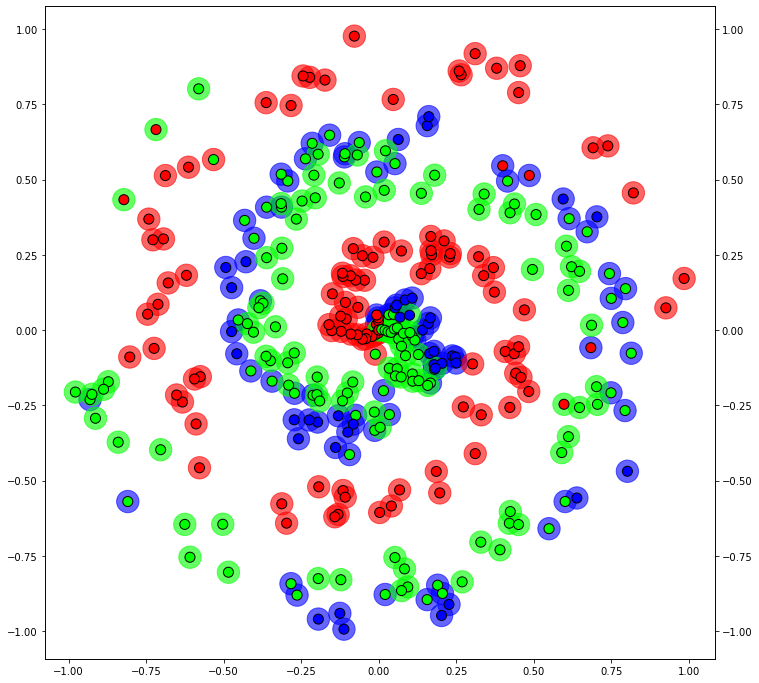

In [76]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

In [78]:
X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)

prediction = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"Accuracy: {accuracy:.3f}, \t loss:{loss:.3f}")

Accuracy: 0.773, 	 loss:0.873


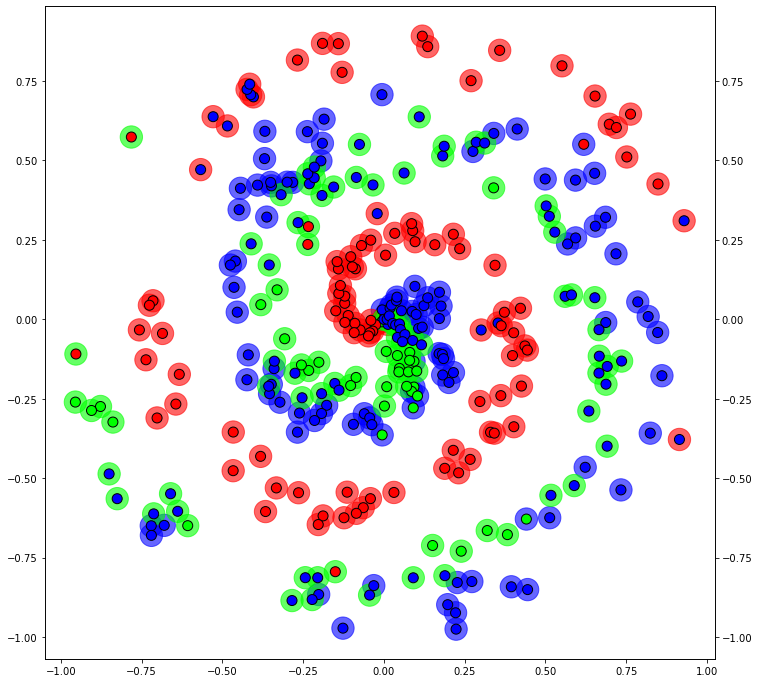

In [80]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X_test[:, 0], X_test[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=prediction, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

# Realni primer - uporaba Keras in Tensorflow knjižnjic

In [81]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Load data

In [82]:
columns = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable"
]
data = pd.read_csv("data/pima-indians-diabetes.data.csv", names=columns)
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data preprocessing

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [86]:
data.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data scaling

In [94]:
num_samples = data.shape[0]
train_samples = 0.8

X_train = data.iloc[:int(num_samples*train_samples), :-1]
y_train = data.iloc[:int(num_samples*train_samples), -1]

X_test = data.iloc[int(num_samples*train_samples):, :-1]
y_test = data.iloc[int(num_samples*train_samples):, -1]

scaling_min = X_train.min()
scaling_max = X_train.max()

def data_scaling(data, scaling_min, scaling_max):
    return (data-scaling_min)/(scaling_max - scaling_min)

X_train = data_scaling(X_train, scaling_min, scaling_max)
X_test = data_scaling(X_test, scaling_min, scaling_max)

X_train.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.223606,0.608323,0.561662,0.208650,0.094917,0.475267,0.172152,0.203284
std,0.196835,0.165171,0.160722,0.161194,0.137877,0.118856,0.143837,0.196213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.500000,0.524590,0.000000,0.000000,0.403875,0.072588,0.050000
50%,0.176471,0.585859,0.573770,0.232323,0.043735,0.476900,0.131725,0.133333
75%,0.352941,0.712121,0.655738,0.323232,0.148936,0.543964,0.242955,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Neural Network Model


In [95]:
model = Sequential()

In [96]:
model.add(Dense(32, input_dim=8, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [97]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## Training

In [99]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
10/10 [==============================] - 2s 7ms/step - loss: 0.6883 - accuracy: 0.6189
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6777 - accuracy: 0.6515
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6696 - accuracy: 0.6531
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6624 - accuracy: 0.6531
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6531
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6531
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6531
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6531
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6460 - accuracy: 0.6531
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.6531
Epoch 11/

10/10 [==============================] - 0s 7ms/step - loss: 0.4413 - accuracy: 0.7899
Epoch 83/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4440 - accuracy: 0.7818
Epoch 84/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4396 - accuracy: 0.8013
Epoch 85/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4390 - accuracy: 0.7915
Epoch 86/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4386 - accuracy: 0.7899
Epoch 87/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4406 - accuracy: 0.7964
Epoch 88/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4373 - accuracy: 0.7915
Epoch 89/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4366 - accuracy: 0.7932
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.7948
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.7915
Epoch 92/10

## Evaluating the model

In [100]:
_, accuracy= model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

5/5 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 0.7727
Accuracy: 77.27%


## Making predictions

In [102]:
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)

for i in range(10):
    print(f"{X_test.iloc[i, :]}")
    print(30*"-")
    print(f"PREDICTIONS: {predictions[i][0]} \t REAL: {y_test.iloc[i]}")
    print("\n\n")

Number of times pregnant                                                    0.647059
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.696970
Diastolic blood pressure (mm Hg)                                            0.606557
Triceps skin fold thickness (mm)                                            0.262626
2-Hour serum insulin (mu U/ml)                                              0.170213
Body mass index (weight in kg/(height in m)^2)                              0.538003
Diabetes pedigree function                                                  0.204526
Age (years)                                                                 0.483333
Name: 614, dtype: float64
------------------------------
PREDICTIONS: 1 	 REAL: 1



Number of times pregnant                                                    0.176471
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.535354
Diastolic blood pressure (mm Hg)                                 

# Save model


In [103]:
model.save("models/diabetes_model2.h5")

In [107]:
from tensorflow.keras.models import load_model
model2 = load_model("models/diabetes_model.h5")


predictions = model2.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)

for i in range(10):
    print(f"{X_test.iloc[i, :]}.")
    print(30*"-")
    print(f"PREDICTION: {predictions[i][0]}, \t REAL: {y_test.iloc[i]}")
    print("\n\n")

Number of times pregnant                                                    0.647059
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.696970
Diastolic blood pressure (mm Hg)                                            0.606557
Triceps skin fold thickness (mm)                                            0.262626
2-Hour serum insulin (mu U/ml)                                              0.170213
Body mass index (weight in kg/(height in m)^2)                              0.538003
Diabetes pedigree function                                                  0.204526
Age (years)                                                                 0.483333
Name: 614, dtype: float64.
------------------------------
PREDICTION: 1, 	 REAL: 1



Number of times pregnant                                                    0.176471
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.535354
Diastolic blood pressure (mm Hg)                                

# Image Recognition and Classification

## Feature Extraction

### Convolutional Neural Network (CNN)

![CNN layer](images/conv-full-layer.gif)

![pooling layer](images/pooling_layer.png)

# Image classification - CIFAR-10 example

![CIFAR-10](images/cifar_10_dataset.png)

In [108]:
seed = 21

---

In [109]:
import numpy as np
from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import cifar10

In [110]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

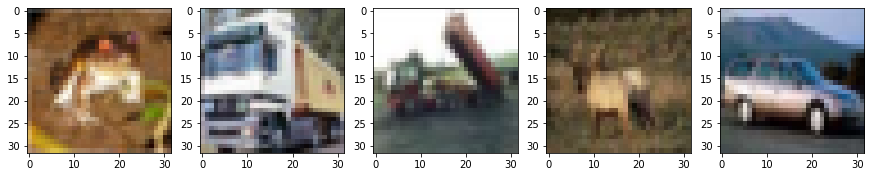

In [111]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
ax1.imshow(X_train[0])
ax2.imshow(X_train[1])
ax3.imshow(X_train[2])
ax4.imshow(X_train[3])
ax5.imshow(X_train[4])

plt.show()

In [112]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255
X_test = X_test / 255

In [113]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

---

## Model Creation

In [114]:
model = keras.Sequential()

In [115]:
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding="same"))
model.add(keras.layers.Activation("relu"))

In [117]:
model.add(keras.layers.Dropout(0.2))

In [118]:
model.add(keras.layers.BatchNormalization())

In [119]:
model.add(keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D((2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

In [120]:
model.add(keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D((2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

In [121]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

In [123]:
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

In [124]:
model.add(keras.layers.Dense(class_num, activation="softmax"))

In [125]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [126]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                    

---

Še enkrat vse skupaj v eni celici:

In [127]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

---

## Traning the model

In [129]:
np.random.seed(seed)

history = model.fit(X_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
106/782 [===>..........................] - ETA: 4:25 - loss: 2.0803 - accuracy: 0.2761

KeyboardInterrupt: 

In [131]:
model = keras.models.load_model("models/cifar_10_25epoch.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [132]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", scores[1])

313/313 [==============================] - 16s 52ms/step - loss: 0.5083 - accuracy: 0.8370
Accuracy:  0.8370000123977661


In [133]:
np.expand_dims(X_test[0], axis=0).shape

(1, 32, 32, 3)

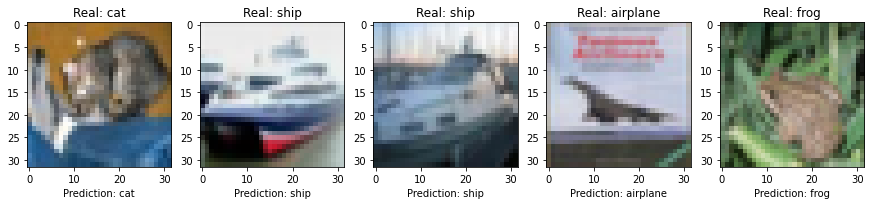

In [135]:
dict_ = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axes):
    image = np.expand_dims(X_test[i], axis=0)
    ax.imshow(X_test[i])
    real_value = np.argmax(y_test[i])
    prediction = np.argmax(model.predict(image))
    
    ax.set_xlabel(f"Prediction: {dict_[prediction]}")
    ax.set_title(f"Real: {dict_[real_value]}")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()


Training history
![Train history](images/cnn_train_history.webp)

# Recurrent Neural Network

![RNN](images/rnn.png)

![anatomy_of_lstm](images/anatomy_of_lstm.png)

## Problem Formulation

## Data Preparation

[GitHub repo](https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter)

In [136]:
text = ""
with open("data/Book 1 - The Philosopher's Stone.txt") as f:
    for line in f.readlines():
        text = text + line.replace("\n", "")
        
text = [text]
print(text[0][:50])

/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of numbe


In [140]:
from keras.preprocessing.text import Tokenizer
tokanizer = Tokenizer(filters='!"#$%&/()=?*+-.,[]{}\n\t', lower=True, split=" ")
tokanizer.fit_on_texts(text)

for i, key in enumerate(tokanizer.word_index.keys()):
    if i>5:
        break
    print(key, "\t", tokanizer.word_index[key])

the 	 1
” 	 2
and 	 3
to 	 4
a 	 5
harry 	 6


In [142]:
sequence = tokanizer.texts_to_sequences(text)
sequence[0][:10]

[1, 147, 71, 1086, 154, 3, 278, 228, 8, 655]

In [143]:
idx_word = tokanizer.index_word

" ".join(idx_word[w] for w in sequence[0][:51])

'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you’d expect to be involved in anything strange or mysterious because they just didn’t hold with such nonsense mr dursley'

In [144]:
idx_word = tokanizer.index_word
word_idx = tokanizer.word_index

## Features and Labels

In [145]:
features = []
labels = []

training_length = 50

seq = sequence[0]
for i in range(training_length, len(seq)):
    extract = seq[i - training_length: i+1]
    features.append(extract[:-1])
    labels.append(extract[-1])
    
features = np.array(features)
features.shape

(85353, 50)

In [146]:
num_words = len(idx_word) +1
label_array = np.zeros((len(features), num_words))

for example_index, word_index in enumerate(labels):
    label_array[example_index, word_index] = 1
label_array.shape

(85353, 6959)

In [147]:
" ".join([idx_word[i] for i in features[0]])

'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you’d expect to be involved in anything strange or mysterious because they just didn’t hold with such nonsense mr'

In [148]:
idx_word[np.argmax(label_array[0])]

'dursley'

# https://kody.js.org/#-Mxp9JZ1HxUrcYZ3us1O

In [149]:
from sklearn.utils import shuffle

def create_train_valid(features,
                       labels,
                       num_words,
                       train_fraction=0.75,
                       RANDOM_STATE = 123):
    """Create training and validation features and labels."""
    
    # Randomly shuffle features and labels
    features, labels = shuffle(features, labels, random_state=RANDOM_STATE)

    # Decide on number of samples for training
    train_end = int(train_fraction * len(labels))

    train_features = np.array(features[:train_end])
    valid_features = np.array(features[train_end:])

    train_labels = labels[:train_end]
    valid_labels = labels[train_end:]

    # Convert to arrays
    X_train, X_valid = np.array(train_features), np.array(valid_features)

    # Using int8 for memory savings
    y_train = np.zeros((len(train_labels), num_words), dtype=np.int8)
    y_valid = np.zeros((len(valid_labels), num_words), dtype=np.int8)

    # One hot encoding of labels
    for example_index, word_index in enumerate(train_labels):
        y_train[example_index, word_index] = 1

    for example_index, word_index in enumerate(valid_labels):
        y_valid[example_index, word_index] = 1
    
    # Memory management
    import gc
    gc.enable()
    del features, labels, train_features, valid_features, train_labels, valid_labels
    gc.collect()

    return X_train, X_valid, y_train, y_valid



X_train, X_valid, y_train, y_valid = create_train_valid(features, labels, num_words)
X_valid.shape, y_valid.shape

((21339, 50), (21339, 6959))

## Building RNN

In [150]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# EMbedding layer
model.add(Embedding(input_dim=num_words,
                     input_length = training_length,
                     output_dim=100,
                     trainable=True, #False
                     #mask_zero=True
                   ))

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation="relu"))

#Droput for regularization
model.add(Dropout(0.5))

#Output layer
model.add(Dense(num_words, activation="softmax"))

#compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [151]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           695900    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 6959)              452335    
                                                                 
Total params: 1,194,635
Trainable params: 1,194,635
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [ ]:
history = model.fit(X_train,  y_train, 
                    batch_size=64,#2048, 
                    epochs=55,#150,
                    validation_data=(X_valid, y_valid),
                    )

In [152]:
model2 = load_model("models/harry_potter_best.h5")
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           678400    
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6784)              440960    
                                                                 
Total params: 1,165,760
Trainable params: 1,165,760
Non-trainable params: 0
_________________________________________________________________


## Text generation

In [153]:
import random
seed_length=50
diversity=1

seed = sequence[0][:50]
print(" ".join([idx_word[x] for x in seed]))
print("---->")
for i in range(30):
    seed = sequence[0][i:50+i]
    # Make a prediction from the seed
    preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(np.float64)
    predictions = preds.argsort()[-10:][::-1]

    index_ = random.choice(predictions) # np.argmax(preds)# če je sam argmax ponavad vn dobiš sam the the the

    print(idx_word[index_], end=" ")
    

the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you’d expect to be involved in anything strange or mysterious because they just didn’t hold with such nonsense mr
---->
ron stack enormous pain finish said cackle “tokens nibble baggy splattered seats friendly not 26 lived longed “gotta tens already clattering glowing “found friendly largest map normal supporting tickling ’s 

# GPT-2 and GPT-J Text Generation

<table style="border-collapse: collapse; width: 55.8987%; height: 107px; margin-left: auto; margin-right: auto;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Model</span></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Number of Parameters</span></td>
<td style="width: 21.5188%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Size</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; height: 18px; text-align: center;"><strong><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">gpt2</span></code></span></strong></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><strong><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">124M</span></strong></td>
<td style="width: 21.5188%; height: 18px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><strong><span style="font-size: 12pt;">523MB</span></strong></span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; height: 18px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-125M</span></code></span></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">125M</span></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">502MB</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-1.3B</span></code></span></td>
<td style="width: 30.6178%; text-align: center; height: 18px;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">1.3B</span></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">4.95GB</span></td>
</tr>
<tr style="height: 17px;">
<td style="width: 39.1738%; height: 17px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-2.7B</span></code></span></td>
<td style="width: 30.6178%; height: 17px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">2.7B</span></td>
<td style="width: 21.5188%; height: 17px; text-align: center;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">9.94GB</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><strong><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-j-6B</span></code></span></strong></td>
<td style="width: 30.6178%; text-align: center; height: 18px;"><strong><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">6B</span></strong></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace;"><strong><span style="font-size: 12pt;">22.5GB</span></strong></span></td>
</tr>
</tbody>
</table>

## Installing library

In [154]:
from transformers import pipeline
# download & load GPT-2 model
gpt2_generator = pipeline('text-generation', model='gpt2')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

## Uporaba knjižnjice

In [155]:
prompt = "Ha"
sentences = gpt2_generator(prompt, 
                           do_sample=True, rry wandered over to the Restricted Section. He had been wondering for a while if
                           top_k=50, 
                           temperature=0.6, 
                           max_length=50, 
                           num_return_sequences=3)
for sentence in sentences:
    print(sentence["generated_text"])
    print("="*50)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Harry wandered over to the Restricted Section. He had been wondering for a while if he could get a better price. He found out he was wrong and he gave up. He walked to the locked room and pulled out his wallet.

"
Harry wandered over to the Restricted Section. He had been wondering for a while if the man had seen him, but he was now back at his room.

"What the hell happened?"

"He's out of town. He
Harry wandered over to the Restricted Section. He had been wondering for a while if there might be something in the room. He hadn't been able to find it, but something about the door had told him that it was locked. The door wasn


https://6b.eleuther.ai/ - online prompt za GPT-J